In [1]:
import seaborn
import torch

c:\Users\Vince\anaconda3\envs\wise_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
graphs = torch.load('datasets/SG256_Full_ONLY_SM_NO_SUBHALO.pt')

In [11]:
dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y:
    stellar_masses.append(y.item())

In [12]:
dark_matter_masses

[485173568.0,
 485918624.0,
 483534464.0,
 322455648.0,
 161227824.0,
 485173568.0,
 479064192.0,
 480703296.0,
 477276096.0,
 475488000.0,
 472954848.0,
 29637.90625,
 43763.96875,
 235285344.0,
 470570688.0,
 36700.9375,
 32573.38671875,
 42855.01171875,
 70421.6953125,
 44389.8046875,
 453881664.0,
 453732672.0,
 454328704.0,
 450454464.0,
 449262400.0,
 2671733.0,
 4102220.0,
 451348512.0,
 452093568.0,
 453881664.0,
 42825.2109375,
 47951.125,
 446282208.0,
 447176256.0,
 448070304.0,
 452987616.0,
 448815360.0,
 1094620.75,
 13112799.0,
 2281329.0,
 12910147.0,
 13038295.0,
 12451199.0,
 11893905.0,
 11697213.0,
 11321710.0,
 12521233.0,
 11580986.0,
 12767098.0,
 9447176.0,
 10499180.0,
 9822679.0,
 10809119.0,
 12974221.0,
 10642229.0,
 11735956.0,
 9088064.0,
 10025331.0,
 11034123.0,
 12160631.0,
 8922664.0,
 9864401.0,
 10914915.0,
 12050365.0,
 12466100.0,
 8611235.0,
 9494859.0,
 11978840.0,
 8143346.5,
 9074653.0,
 11151840.0,
 12303680.0,
 8806437.0,
 9374162.0,
 1036805

In [13]:
stellar_masses

[3295505.75,
 3295505.75,
 3247353.25,
 3247353.25,
 3247353.25,
 3295505.75,
 3247353.25,
 3247353.25,
 3247353.25,
 3247353.25,
 3252629.75,
 2094715.0,
 2410690.5,
 3252716.0,
 3258092.5,
 2273294.75,
 2055990.0,
 2406001.75,
 2394787.5,
 2388122.75,
 2979704.5,
 2979704.5,
 2979704.5,
 2913475.75,
 2913475.75,
 2899.555419921875,
 4475.2763671875,
 2913475.75,
 2979704.5,
 2979704.5,
 2038387.625,
 2070695.0,
 2913475.75,
 2913475.75,
 2913475.75,
 2979704.5,
 2913475.75,
 3701.34033203125,
 1121.2847900390625,
 639.618408203125,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625,
 1121.2847900390625

In [14]:
redshifts

[9.325244903564453,
 9.327377319335938,
 9.343400955200195,
 9.338054656982422,
 9.333780288696289,
 9.331645965576172,
 9.362693786621094,
 9.356254577636719,
 9.36806583404541,
 9.374520301818848,
 9.3809814453125,
 9.412327766418457,
 9.405826568603516,
 9.392849922180176,
 9.387452125549316,
 9.44277286529541,
 9.474494934082031,
 9.430790901184082,
 9.424267768859863,
 9.41775131225586,
 9.487677574157715,
 9.48327922821045,
 9.48108196258545,
 9.513036727905273,
 9.51856517791748,
 9.405826568603516,
 9.399333953857422,
 9.506409645080566,
 9.49979019165039,
 9.489877700805664,
 9.589855194091797,
 9.596588134765625,
 9.545186042785645,
 9.538518905639648,
 9.531859397888184,
 9.493180274963379,
 9.525208473205566,
 9.405826568603516,
 9.789813995361328,
 9.641694068908691,
 9.816658020019531,
 9.80263614654541,
 9.86484146118164,
 9.927767753601074,
 9.955302238464355,
 9.991426467895508,
 9.871928215026855,
 9.96972370147705,
 9.823681831359863,
 10.180679321289062,
 10.0852460

Text(0, 0.5, 'Stellar Mass (MSun)')

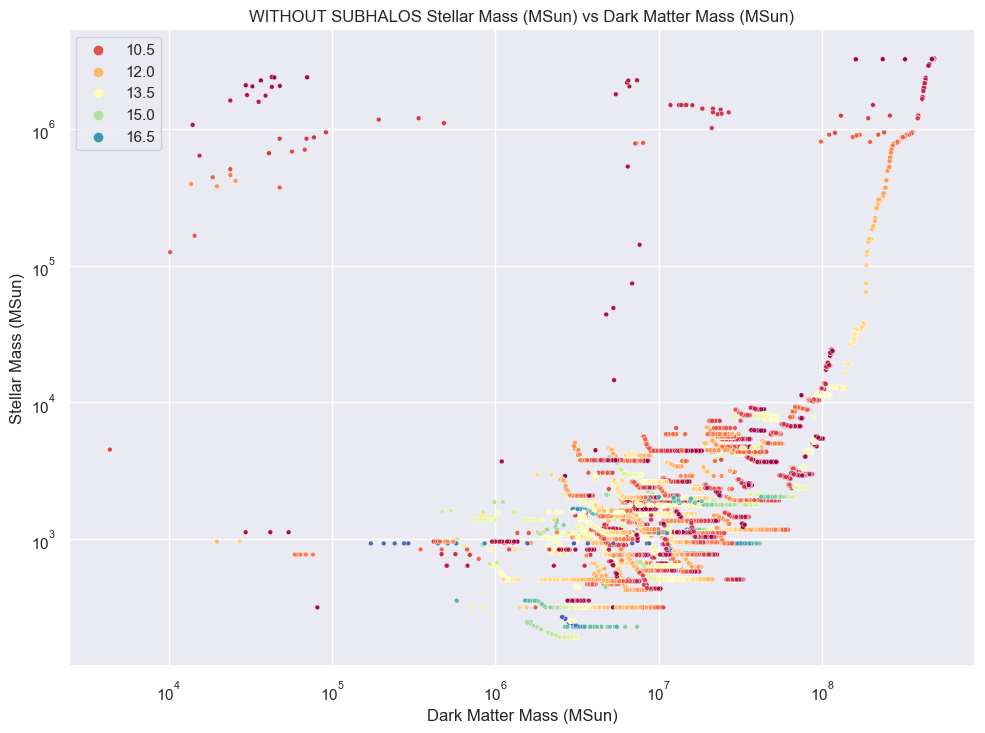

In [15]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=stellar_masses, hue=redshifts, palette='Spectral',s=12)
ax.set_title('WITHOUT SUBHALOS Stellar Mass (MSun) vs Dark Matter Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Stellar Mass (MSun)')